In [1]:
import time
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
TEST_SIZE = 0.2

def saving_results(results, path, file_name):

    results.to_csv(path + file_name,  index = False, sep=";")

def train_model(classifier, X_train_v, X_test_v, y_train, y_test):
    ini = time.time()
    classifier.fit(X_train_v, y_train)
    predictions = classifier.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')
    f1_score = metrics.f1_score(y_test, predictions, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))

    return timee , acuracia, precision, recall, f1_score, matriz_confusao

def get_tests_result(X_train_v, X_test_v, y_train, y_test):

    all_res = []
    ### MLPClassifier

    #print( "MLPClassifier")
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70, ), random_state=1, verbose=True)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["MLPClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### AdaBoostClassifier

    #print( "AdaBoostClassifier: ")
    clf = AdaBoostClassifier(n_estimators= 50, learning_rate=1)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["AdaBoostClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### Voting_LR3_SVC1_ETC2
    #print( "Voting_LR3_SVC1_ETC2: ")
    ini = time.time()
    clf2 = LogisticRegression(random_state=0)
    clf5 = SVC(kernel='rbf', probability=True)
    clf6 = ExtraTreesClassifier(n_estimators=100, random_state=0)
    eclf = VotingClassifier(estimators=[ ('lr', clf2), ('svc', clf5), ('etc', clf6)], voting='soft', weights=[3, 1, 2])
    clf2 = clf2.fit(X_train_v, y_train)
    clf5 = clf5.fit(X_train_v, y_train)
    clf6 = clf6.fit(X_train_v, y_train)
    eclf = eclf.fit(X_train_v, y_train)
    #Y_previsto_vc1 = eclf.predict(X_test_v.toarray())
    Y_previsto_vc1 = eclf.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_previsto_vc1)
    precision = precision_score(y_test, Y_previsto_vc1, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_previsto_vc1)
    recall = recall_score(y_test, Y_previsto_vc1, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_previsto_vc1, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))
    # print(matriz_confusao)
    all_res.append(["Voting_LR3_SVC1_ETC2: ", timee , acuracia, precision, recall, f1_score])



    ### DecisionTreeClassifier
    #print( "DecisionTreeClassifier: ")
    clf = DecisionTreeClassifier(random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["DecisionTreeClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### RandomForestClassifier
    #print( "RandomForestClassifier: " )
    clf = RandomForestClassifier(n_estimators=100, random_state=2)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["RandomForestClassifier: ", timee , acuracia, precision, recall, f1_score])




    ### ExtraTreesClassifier
    #print( "ExtraTreesClassifier: ")
    clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["ExtraTreesClassifier: ", timee , acuracia, precision, recall, f1_score])



    ### LogisticRegression
    #print( "LogisticRegression: ")
    clf = LogisticRegression(random_state=0)
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["LogisticRegression: ",  timee , acuracia, precision, recall, f1_score])



    ### svm
    #print( "svm: ")
    clf = svm.SVC()
    timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    all_res.append(["svm: ",  timee , acuracia, precision, recall, f1_score])



    ### Stacking_scikit
    #print( "Stacking_scikit: ")
    clf1 = RandomForestClassifier(n_estimators=100, random_state=2)
    clf2 = LogisticRegression(random_state=0)
    clf3 = SVC()
    clf4 = ExtraTreesClassifier(n_estimators=100, random_state=0)
    estimators = [('rf', clf1), ('lr', clf2), ('svc', clf3), ('etc', clf4)]
    ini = time.time()
    clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression(), n_jobs=None)
    clf.fit(X_train_v, y_train)
    Y_Previsto_stacking = clf.predict(X_test_v)
    fim = time.time()

    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_Previsto_stacking)
    precision = precision_score(y_test, Y_Previsto_stacking, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_Previsto_stacking)
    recall = recall_score(y_test, Y_Previsto_stacking, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_Previsto_stacking, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))
    # print(matriz_confusao)
    all_res.append(["Stacking_scikit: ",  timee , acuracia, precision, recall, f1_score])



    ### XGBClassifier
    #print( "XGBClassifier: ")
    #clf = XGBClassifier(eval_metric='mlogloss' )
    #timee , acuracia, precision, recall, f1_score, matriz_confusao = train_model(clf, X_train_v, X_test_v, y_train, y_test)
    #print(matriz_confusao)
    #all_res.append(["XGBClassifier: ",  timee , acuracia, precision, recall, f1_score])



    ### OneVsRestClassifier_RF
    #print( "OneVsRest_RF: ")
    clf = RandomForestClassifier(n_estimators=50, random_state=1)
    ovr = OneVsRestClassifier(clf)
    ini = time.time()
    ovr.fit(X_train_v, y_train)
    Y_Previsto_OVR_RF = ovr.predict(X_test_v)
    fim = time.time()


    timee = fim-ini
    acuracia = accuracy_score(y_test, Y_Previsto_OVR_RF)
    precision = precision_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    matriz_confusao =  confusion_matrix(y_test, Y_Previsto_OVR_RF)
    recall = recall_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    f1_score = metrics.f1_score(y_test, Y_Previsto_OVR_RF, average='weighted')
    # print("Time: " + str(timee))
    # print("Acurácia: " + str(acuracia))
    # print("Precision: " + str(precision))
    # print("Recal: " + str(recall))
    # print("f1_score: " + str(f1_score))
    # print(matriz_confusao)
    all_res.append(["OvR_RF: ",  timee , acuracia, precision, recall, f1_score])

    return pd.DataFrame( all_res, columns=["ALGORITHM","TIME","ACCURACY","PRECISION","RECALL", "F1_SCORE"])




In [3]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/'
file = 'dados.xlsx'
file_antes = 'Antes_do_Curso.xlsx'
file_depois = "Depois_do_Curso.xlsx"


DATASET = pd.read_excel(path + file)


def transformar_0_em_NaN(dataset):
  dataset = dataset.replace(0, np.nan)
  return dataset

def limpar_dataset(dataset, *colunas_lindep):
  #dropando colunas "inúteis"
  dataset = dataset.drop(columns=['Ano','Missão','Aluno'])

  #Dropando colunas linearmente dependentes
  dataset = dataset.drop(columns=list(colunas_lindep), errors='ignore')


  #No excel por algum motivo todas as colunas numéricas exceto 'ACTN3','AGT','ECA' e 'BDKRB2' estão como categóricas, então temos que passá-las para numericas
  for coluna in dataset.columns:
      if coluna == 'ACTN3' or coluna == 'AGT' or coluna == 'ECA' or coluna == 'BDKRB2':
          continue
      if dataset[coluna].dtype == 'object':
          dataset[coluna] = pd.to_numeric(dataset[coluna], errors='coerce')
  return dataset

DATASET = limpar_dataset(DATASET,'Pré CK (U/L)','Pós CK (U/L)')

DATASET


Mounted at /content/drive


Idade  Peso Kg  Cor da pele ACTN3  AGT  ECA   BDKRB2  Score Força%  \
0     33.0     88.0          1.0    XX   MT   ID  (-9,-9)          25.0   
1     26.0     74.0          1.0    RR   MT   II  (+9,-9)          50.0   
2     26.0     76.0          1.0    RX   MM   ID  (+9,+9)          50.0   
3     25.0     84.0          1.0    RR   TT   DD  (+9,-9)           NaN   
4     33.0     82.0          1.0    RR   MT   II  (+9,-9)          50.0   
..     ...      ...          ...   ...  ...  ...      ...           ...   
462   29.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
463   27.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
464   28.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
465   29.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   
466   29.0      NaN          2.0   NaN  NaN  NaN      NaN           NaN   

     Score Resistência %  Pré CK MB U/L  ...  Pós BASO %  Lesão Renal Aguda  \
0                   75.0            3.0  ...         0.1              False   
1                   50.0            6.0  ...         0.2              False   
2                   50.0           43.0  ...         0.3              False   
3                    NaN            5.0  ...         0.9              False   
4                   50.0            3.0  ...         0.1              False   
..                   ...            ...  ...         ...                ...   
462                  NaN            NaN  ...         NaN              False   
463                  NaN            NaN  ...         NaN              False   
464                  NaN            NaN  ...         NaN              False   
465                  NaN            NaN  ...         NaN              False   
466                  NaN            NaN  ...         NaN              False   

     Rabdomiólise  massa magra  MCT KG  ESTATURA  vo2max estimado  \
0           False        75.52    84.3     181.5            50.85   
1            True        69.49    75.9     171.0            51.98   
2            True        72.07    79.2     174.0            52.42   
3            True        75.26    84.3     178.0            50.68   
4            True        66.26    79.6     182.0            47.64   
..            ...          ...     ...       ...              ...   
462         False          NaN    82.8     182.0              NaN   
463         False          NaN    75.1     170.0              NaN   
464         False          NaN    82.7     179.5              NaN   
465         False          NaN    80.5     181.0              NaN   
466         False          NaN    85.8     178.0              NaN   

     Handgrip     Dom.  Handgrip Cont.  % gordura  
0                 35.0            37.0      10.05  
1                 42.0            43.0       6.08  
2                 49.5            49.5       8.72  
3                 60.0            57.0      10.61  
4                 51.0            49.0      14.84  
..                 ...             ...        ...  
462               56.0            59.0        NaN  
463               48.0            60.0        NaN  
464               58.0            52.0        NaN  
465               60.0            50.0        NaN  
466               55.0            56.0        NaN  

[467 rows x 91 columns]

**PREPRAÇÃO DOS DADOS**

CASO 1 - Preencher NaN

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

def encoded_dataset(DATASET):
  DATASET_encoded = DATASET.copy()
  DATASET_encoded = DATASET_encoded.replace('-', np.nan)

  # Preencher numéricos com média
  imputer_mean = SimpleImputer(strategy='mean')
  X_numeric = DATASET_encoded.select_dtypes(include=['float64', 'int64'])
  DATASET_encoded[X_numeric.columns] = imputer_mean.fit_transform(X_numeric)

  # Preencher categóricos com moda
  imputer_freq = SimpleImputer(strategy='most_frequent')
  X_categorical = DATASET_encoded.select_dtypes(include=['object', 'category'])
  DATASET_encoded[X_categorical.columns] = imputer_freq.fit_transform(X_categorical)

  #Transformando strings em inteiros
  label_encoder = preprocessing.LabelEncoder()
  for coluna in DATASET_encoded.select_dtypes(include=['object', 'category']).columns:
      DATASET_encoded[coluna] = label_encoder.fit_transform(DATASET_encoded[coluna].astype(str))

  return DATASET_encoded


def preparar_treino_e_teste(dataset, target_coluna, test_size=0.2):
    # Separando X e y
    X = dataset.drop(columns=[target_coluna])
    y = dataset[target_coluna]
    colunas = X.columns

    # Dividindo em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Normalizando os dados
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, colunas



DATASET_encoded = encoded_dataset(DATASET)
X_encoded_Train, X_encoded_Test, y_encoded_Train, y_encoded_Test, colunas = preparar_treino_e_teste(DATASET_encoded, 'Rabdomiólise')








DATASET_encoded

Idade    Peso Kg  Cor da pele  ACTN3  AGT  ECA  BDKRB2  Score Força%  \
0     33.0  88.000000          1.0      3    1    1       2     25.000000   
1     26.0  74.000000          1.0      0    1    2       1     50.000000   
2     26.0  76.000000          1.0      1    0    1       0     50.000000   
3     25.0  84.000000          1.0      0    2    0       1     56.945274   
4     33.0  82.000000          1.0      0    1    2       1     50.000000   
..     ...        ...          ...    ...  ...  ...     ...           ...   
462   29.0  72.469128          2.0      0    1    1       1     56.945274   
463   27.0  72.469128          2.0      0    1    1       1     56.945274   
464   28.0  72.469128          2.0      0    1    1       1     56.945274   
465   29.0  72.469128          2.0      0    1    1       1     56.945274   
466   29.0  72.469128          2.0      0    1    1       1     56.945274   

     Score Resistência %  Pré CK MB U/L  ...  Pós BASO %  Lesão Renal Aguda  \
0              75.000000       3.000000  ...    0.100000              False   
1              50.000000       6.000000  ...    0.200000              False   
2              50.000000      43.000000  ...    0.300000              False   
3              43.077114       5.000000  ...    0.900000              False   
4              50.000000       3.000000  ...    0.100000              False   
..                   ...            ...  ...         ...                ...   
462            43.077114      14.040698  ...    0.368832              False   
463            43.077114      14.040698  ...    0.368832              False   
464            43.077114      14.040698  ...    0.368832              False   
465            43.077114      14.040698  ...    0.368832              False   
466            43.077114      14.040698  ...    0.368832              False   

     Rabdomiólise  massa magra  MCT KG  ESTATURA  vo2max estimado  \
0           False    75.520000    84.3     181.5        50.850000   
1            True    69.490000    75.9     171.0        51.980000   
2            True    72.070000    79.2     174.0        52.420000   
3            True    75.260000    84.3     178.0        50.680000   
4            True    66.260000    79.6     182.0        47.640000   
..            ...          ...     ...       ...              ...   
462         False    69.775015    82.8     182.0        47.478563   
463         False    69.775015    75.1     170.0        47.478563   
464         False    69.775015    82.7     179.5        47.478563   
465         False    69.775015    80.5     181.0        47.478563   
466         False    69.775015    85.8     178.0        47.478563   

     Handgrip     Dom.  Handgrip Cont.  % gordura  
0                 35.0            37.0  10.050000  
1                 42.0            43.0   6.080000  
2                 49.5            49.5   8.720000  
3                 60.0            57.0  10.610000  
4                 51.0            49.0  14.840000  
..                 ...             ...        ...  
462               56.0            59.0  10.682962  
463               48.0            60.0  10.682962  
464               58.0            52.0  10.682962  
465               60.0            50.0  10.682962  
466               55.0            56.0  10.682962  

[467 rows x 91 columns]

CASO 2 - Dropar colunas com 50% mais de NaN e depois dropar linhas com NaN

In [5]:
taxa_drop = 0.5

#Dropando as colunas com valores NULL maiores que taxa_drop
DATASET_drop_cols50 = DATASET.copy()

DATASET_drop_cols50 = DATASET_drop_cols50.loc[:, DATASET_drop_cols50.isnull().mean() < taxa_drop]

DATASET_drop_cols50 = DATASET_drop_cols50.dropna()


#Codificar colunas categóricas
label_encoder = preprocessing.LabelEncoder()
for coluna in DATASET_drop_cols50.select_dtypes(include=['object', 'category']).columns:
    DATASET_drop_cols50[coluna] = label_encoder.fit_transform(DATASET_drop_cols50[coluna].astype(str))

X_drop_cols50 = DATASET_drop_cols50.drop(columns=['Rabdomiólise'])
scale_obj = preprocessing.StandardScaler()
X_drop_cols50 = scale_obj.fit_transform(X_drop_cols50)

y_drop_cols50 = DATASET_drop_cols50['Rabdomiólise']

X_drop_cols50_Train, X_drop_cols50_Test, y_drop_cols50_Train, y_drop_cols50_Test = train_test_split(X_drop_cols50,y_drop_cols50,test_size=TEST_SIZE)


DATASET_drop_cols50

Idade  Peso Kg  Cor da pele  ACTN3  AGT  ECA  BDKRB2  Score Força%  \
0     33.0     88.0          1.0      3    1    1       2          25.0   
1     26.0     74.0          1.0      0    1    2       1          50.0   
2     26.0     76.0          1.0      1    0    1       0          50.0   
4     33.0     82.0          1.0      0    1    2       1          50.0   
5     31.0     92.0          1.0      3    1    1       2         100.0   
..     ...      ...          ...    ...  ...  ...     ...           ...   
338   28.0     87.0          1.0      3    2    0       1          62.5   
339   27.0     78.5          1.0      0    0    0       2          50.0   
340   25.0     85.1          1.0      3    2    1       2          37.5   
342   28.0     85.0          1.0      0    1    1       2          50.0   
343   28.0     81.0          1.0      3    2    0       1          62.5   

     Score Resistência %  Pré CK MB U/L  ...  Pós BASO %  Lesão Renal Aguda  \
0                   75.0            3.0  ...         0.1              False   
1                   50.0            6.0  ...         0.2              False   
2                   50.0           43.0  ...         0.3              False   
4                   50.0            3.0  ...         0.1              False   
5                    0.0            4.0  ...         0.3              False   
..                   ...            ...  ...         ...                ...   
338                 37.5           21.0  ...         3.1              False   
339                 50.0           20.0  ...         0.2              False   
340                 62.5           20.0  ...         0.4              False   
342                 50.0           19.0  ...         0.4              False   
343                 37.5           38.0  ...         1.1               True   

     Rabdomiólise  massa magra  MCT KG  ESTATURA  vo2max estimado  \
0           False        75.52   84.30     181.5            50.85   
1            True        69.49   75.90     171.0            51.98   
2            True        72.07   79.20     174.0            52.42   
4            True        66.26   79.60     182.0            47.64   
5            True        73.99   90.20     184.5            47.05   
..            ...          ...     ...       ...              ...   
338          True        74.20   83.60     175.0            50.56   
339          True        73.39   85.65     177.0            51.46   
340         False        72.78   80.00     177.5             0.00   
342          True        53.70   62.35     169.0            52.58   
343          True        74.20   83.60     175.0            50.56   

     Handgrip     Dom.  Handgrip Cont.  % gordura  
0                 35.0            37.0      10.05  
1                 42.0            43.0       6.08  
2                 49.5            49.5       8.72  
4                 51.0            49.0      14.84  
5                 54.0            47.0      16.90  
..                 ...             ...        ...  
338               54.0            42.0       8.43  
339               48.0            52.0      10.92  
340               42.0            42.0       7.58  
342               44.0            38.0       9.73  
343               54.0            42.0       8.43  

[264 rows x 91 columns]

**SALVANDO METRICAS SEM PCA**


PARA DATASET COM DROP NAS LINHAS COM NAN


In [6]:
results_drop_cols50 = get_tests_result(X_drop_cols50_Train, X_drop_cols50_Test, y_drop_cols50_Train, y_drop_cols50_Test)
saving_results(results_drop_cols50,
              path + "ResultadosTestesPIBITI/TesteSemPCA/",
              "resultados_rabdomiolise_dropcols.csv")

PARA ENCODED DATASET

In [7]:
results_encoded = get_tests_result(X_encoded_Train, X_encoded_Test, y_encoded_Train, y_encoded_Test)
saving_results(results_encoded,
              path + "ResultadosTestesPIBITI/TesteSemPCA/",
              "resultados_rabdomiolise_encoded.csv")


In [23]:
#Salvando matriz de covariança
import csv
def salvar_matriz_covarianca(X_Train, name, colunas_df):
  pca = PCA()
  pca.fit(X_Train)
  matriz_covarianca = pca.get_covariance()

  with open( path + name, mode='w', newline='') as file:
      writer = csv.writer(file)

      writer.writerow(colunas_df)

      writer.writerows(matriz_covarianca)

  print("Arquivo salvo com sucesso!")

salvar_matriz_covarianca(X_encoded_Train, "matrizCovariança.csv",colunas)

Arquivo salvo com sucesso!


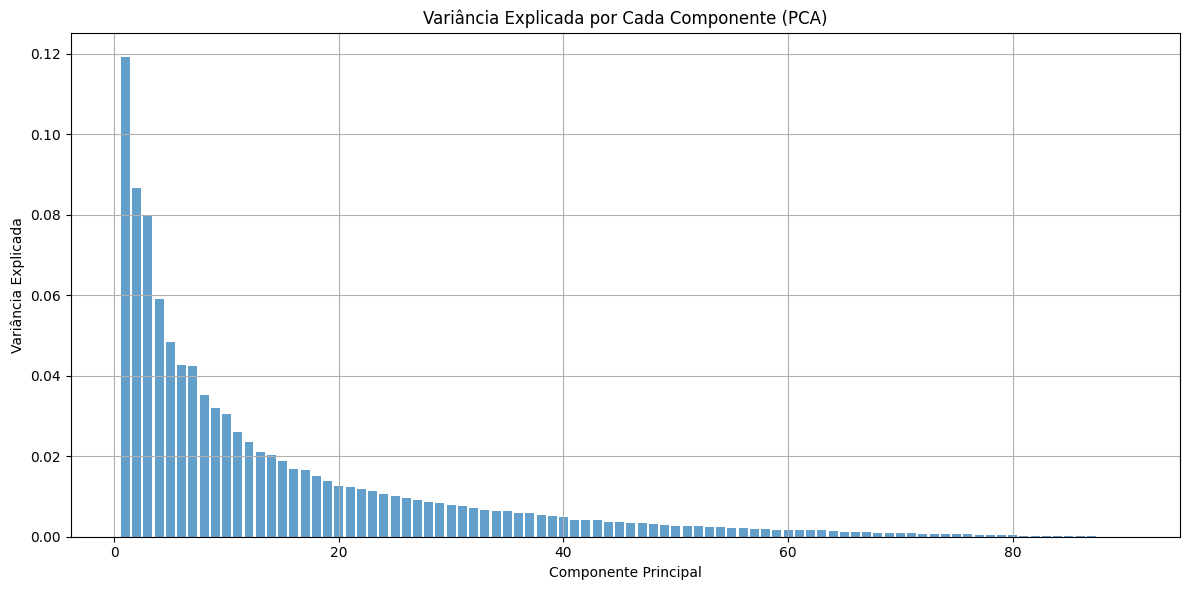

In [9]:
def variancia_por_componente(X_Train):
  pca = PCA()
  pca.fit(X_Train)
  # Variância explicada por cada componente
  explained_variance = pca.explained_variance_ratio_

  # Gráfico da variância explicada por componente
  plt.figure(figsize=(12, 6))
  plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
  plt.ylabel('Variância Explicada')
  plt.xlabel('Componente Principal')
  plt.title('Variância Explicada por Cada Componente (PCA)')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

variancia_por_componente(X_encoded_Train)

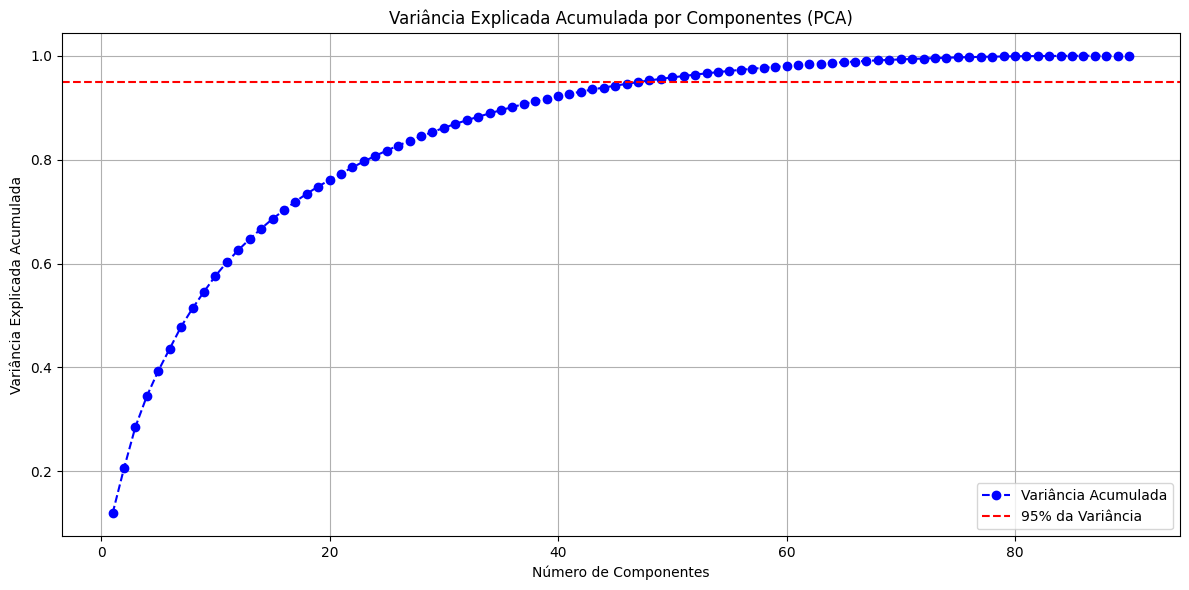

Número de componentes necessários para explicar 95% da variância: 48


In [10]:
def variancia_explicada_acumulada(X_Train, percent_of_variance):
  pca = PCA()
  pca.fit(X_Train)
  explained_variance = pca.explained_variance_ratio_
  # Variância explicada acumulada
  cumulative_variance = np.cumsum(explained_variance)

  # Gráfico da variância acumulada
  plt.figure(figsize=(12, 6))
  plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b', label='Variância Acumulada')
  plt.axhline(y=0.95, color='r', linestyle='--', label='95% da Variância')
  plt.xlabel('Número de Componentes')
  plt.ylabel('Variância Explicada Acumulada')
  plt.title('Variância Explicada Acumulada por Componentes (PCA)')
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()


  n_components = np.argmax(cumulative_variance >= percent_of_variance) + 1 #Numero de componentes para explicar pelo menos 95% da variança
  print(f"Número de componentes necessários para explicar 95% da variância: {n_components}")

variancia_explicada_acumulada(X_encoded_Train, 0.95)

In [11]:
#Verificando os coeficientes das variaveis
#Cada linha corresponde a uma componente principal
#Cada coluna corresponde a variavel original do database
def loadings_df_func(X_Train, col):
  pca = PCA()
  pca.fit(X_Train)
  loadings = pca.components_.T
  feature_names = col.tolist()


  loadings_df = pd.DataFrame(
      data=loadings,
      columns=[f"PC{i+1}" for i in range(len(loadings))],
      index=feature_names
  )
  return loadings_df, loadings

loadings_df, loadings = loadings_df_func(X_encoded_Train,colunas)
loadings_df

PC1       PC2       PC3       PC4       PC5       PC6  \
Idade              0.013122 -0.023550  0.068404  0.061541  0.085987  0.018428   
Peso Kg            0.026162  0.093859  0.021551  0.131524  0.089356  0.015283   
Cor da pele        0.187176 -0.023926 -0.002601  0.149209  0.106436 -0.089872   
ACTN3              0.020194 -0.025625  0.004104 -0.122436 -0.018093  0.125769   
AGT               -0.068999  0.013282  0.044092 -0.050683 -0.017813 -0.084798   
...                     ...       ...       ...       ...       ...       ...   
ESTATURA          -0.066434  0.080057  0.026517  0.220038  0.137507  0.246726   
vo2max estimado   -0.035446  0.023660 -0.000150  0.126540  0.070808  0.170617   
Handgrip     Dom. -0.089089  0.055864  0.078920  0.247943  0.147387  0.115156   
Handgrip Cont.    -0.099786  0.059072  0.071511  0.237498  0.121975  0.092717   
% gordura         -0.071183  0.041509  0.041830  0.093700  0.048652  0.112914   

                        PC7       PC8       PC9      PC10  ...      PC81  \
Idade             -0.001845 -0.054935 -0.036114  0.026689  ...  0.000755   
Peso Kg            0.189083 -0.067531 -0.025315 -0.008726  ... -0.018179   
Cor da pele       -0.029606 -0.070720 -0.017332 -0.066399  ...  0.024155   
ACTN3              0.189416  0.095543  0.002145 -0.062697  ... -0.013428   
AGT               -0.006263 -0.143698 -0.003423  0.019448  ...  0.011350   
...                     ...       ...       ...       ...  ...       ...   
ESTATURA           0.190126  0.008892 -0.020616 -0.047817  ... -0.073218   
vo2max estimado    0.050574  0.002949 -0.057642  0.055070  ...  0.013042   
Handgrip     Dom.  0.124904 -0.050838  0.081914 -0.069454  ...  0.053987   
Handgrip Cont.     0.107547 -0.037831  0.108919 -0.089220  ... -0.044195   
% gordura          0.088078 -0.122130 -0.016015  0.001085  ... -0.011541   

                       PC82      PC83      PC84      PC85      PC86      PC87  \
Idade              0.016940  0.014305 -0.010656 -0.008932 -0.009272  0.000673   
Peso Kg           -0.003429  0.010572  0.012352 -0.002789 -0.000754  0.005626   
Cor da pele       -0.013983 -0.025347  0.017713  0.004049  0.002819 -0.000030   
ACTN3              0.001352 -0.006237 -0.013459  0.010991  0.006485 -0.005604   
AGT               -0.002115  0.007213  0.001307  0.004337 -0.008123 -0.007998   
...                     ...       ...       ...       ...       ...       ...   
ESTATURA          -0.084442  0.017780  0.001274  0.025315  0.044343  0.005788   
vo2max estimado    0.006266 -0.008828 -0.013776  0.012713  0.004006  0.013006   
Handgrip     Dom.  0.033083  0.030121 -0.018954  0.003695  0.001197 -0.007369   
Handgrip Cont.    -0.021026 -0.040916  0.015534  0.001606 -0.004200 -0.002298   
% gordura          0.003256 -0.017098  0.005354 -0.023821 -0.009070  0.001087   

                       PC88      PC89      PC90  
Idade             -0.002601 -0.000219 -0.000245  
Peso Kg            0.006288  0.000327 -0.000403  
Cor da pele       -0.002064  0.002452  0.000314  
ACTN3             -0.001929  0.001397  0.000338  
AGT                0.005913  0.002809 -0.000390  
...                     ...       ...       ...  
ESTATURA          -0.010060  0.001802 -0.000636  
vo2max estimado    0.005217 -0.001726 -0.000066  
Handgrip     Dom. -0.002266  0.004550  0.000090  
Handgrip Cont.     0.001235  0.000453 -0.000198  
% gordura         -0.001939  0.001114  0.000318  

[90 rows x 90 columns]

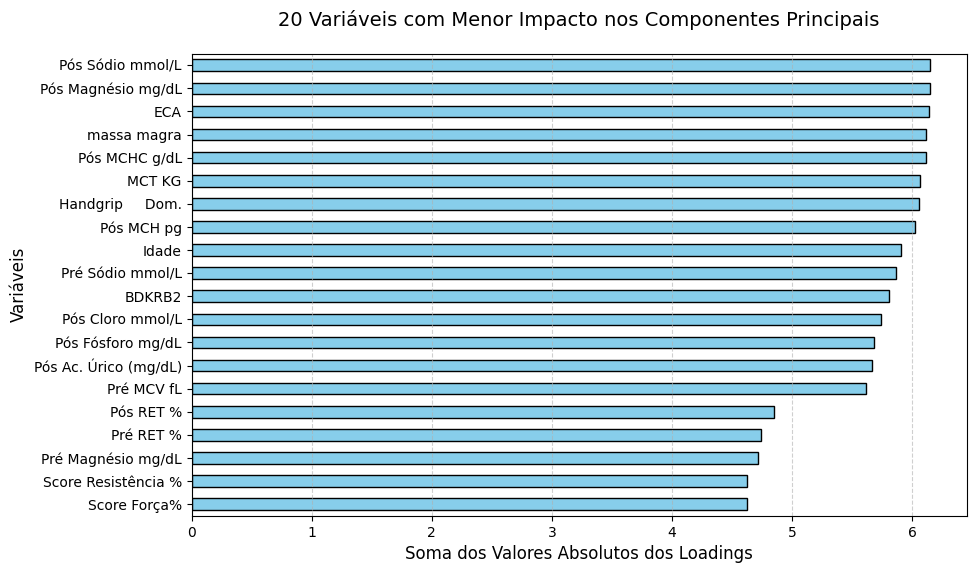

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


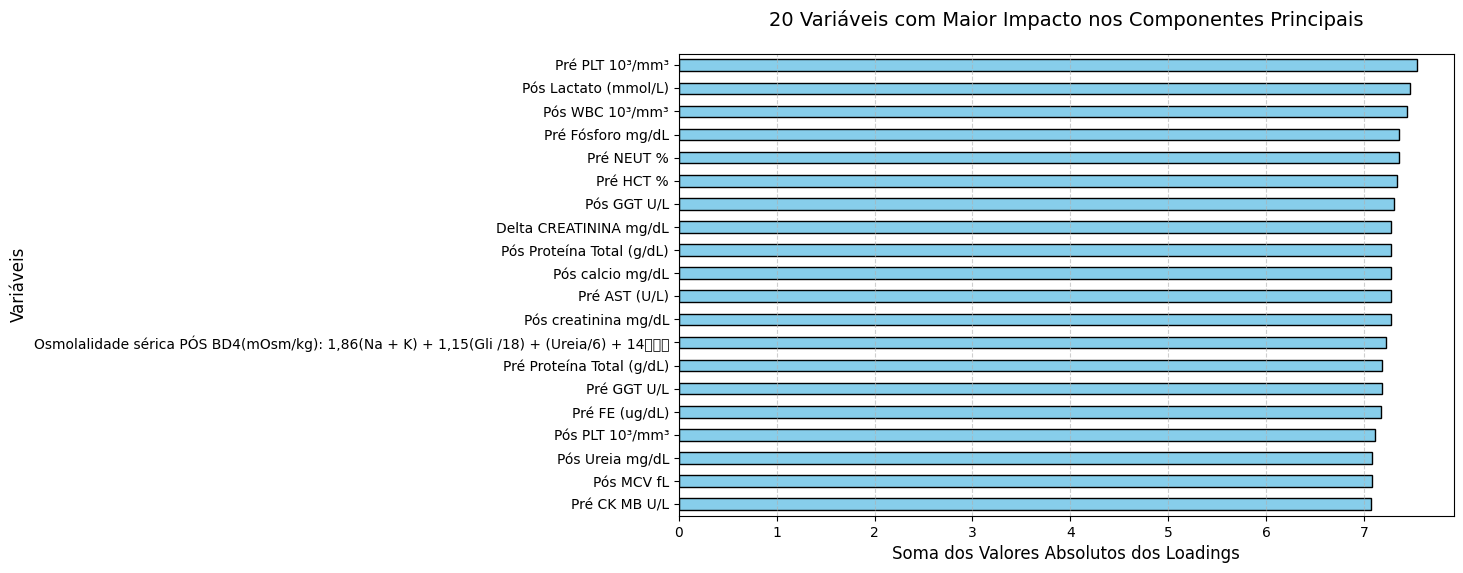

In [12]:
def plot_coef_sum(loadings_df, loadings, num_plots=20, mode='menor'):
    """
    Plota variáveis com menor ou maior soma dos coeficientes da matriz de loadings.

    Parâmetros:
        loadings_df (pd.DataFrame): DataFrame com as variáveis.
        loadings (np.ndarray ou pd.DataFrame): Matriz de loadings.
        num_plots (int): Quantidade de variáveis a exibir (default=20).
        mode (str): 'menor' para menor impacto ou 'maior' para maior impacto.
    """
    # Calcula a soma dos valores absolutos dos loadings
    loadings_df['total_contribution'] = np.abs(loadings).sum(axis=1)

    # Escolhe o conjunto de variáveis conforme o modo
    if mode == 'menor':
        data = loadings_df['total_contribution'].sort_values().head(num_plots)
        title = f'{num_plots} Variáveis com Menor Impacto nos Componentes Principais'
    elif mode == 'maior':
        data = loadings_df['total_contribution'].sort_values().tail(num_plots)
        title = f'{num_plots} Variáveis com Maior Impacto nos Componentes Principais'
    else:
        raise ValueError("O parâmetro 'mode' deve ser 'menor' ou 'maior'")

    # Plota
    data.plot.barh(
        figsize=(10, 6),
        color='skyblue',
        edgecolor='black'
    )

    plt.xlabel('Soma dos Valores Absolutos dos Loadings', fontsize=12)
    plt.ylabel('Variáveis', fontsize=12)
    plt.title(title, fontsize=14, pad=20)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

plot_coef_sum(loadings_df, loadings)
plot_coef_sum(loadings_df, loadings, mode="maior")

In [13]:
#Soma ponderada pela variância explicada de cada PC
#Aqui estamos multiplicando o coeficiente pelo peso que o PC explica a variança
def weighted_sum_loadings(X_Train, loadings_df, loadings):
  pca = PCA()
  pca.fit(X_Train)
  explained_variance = pca.explained_variance_ratio_
  loadings_df['weighted_contribution'] = np.abs(loadings) @ explained_variance
  loadings_df['weighted_contribution']
  return loadings_df

loadings_df = weighted_sum_loadings(X_encoded_Train, loadings_df, loadings)
loadings_df['weighted_contribution']


Idade                0.071444
Peso Kg              0.081007
Cor da pele          0.078557
ACTN3                0.074982
AGT                  0.078838
                       ...   
ESTATURA             0.079448
vo2max estimado      0.080065
Handgrip     Dom.    0.084434
Handgrip Cont.       0.086238
% gordura            0.082559
Name: weighted_contribution, Length: 90, dtype: float64

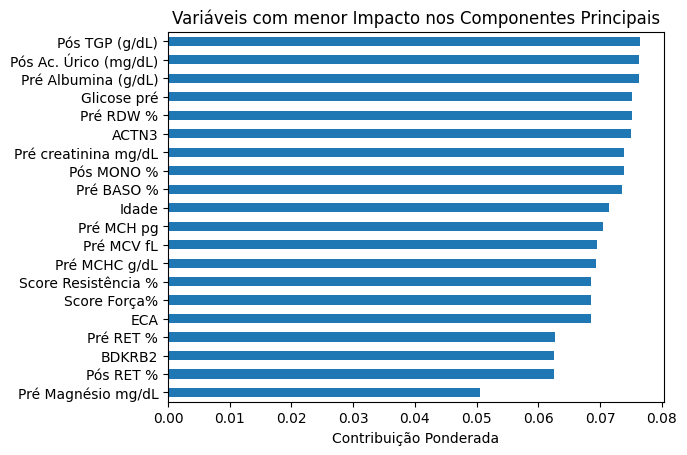

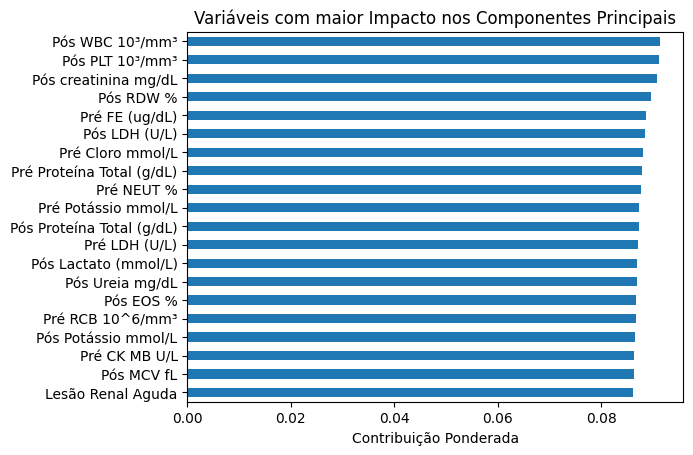

(90,)

In [14]:
def plot_weighted_contribution(loadings_df, mode="menor"):
  # Gráfico das variáveis menos relevantes, utilizando a metrica com ponderação
  name = mode.capitalize()
  if mode == "menor":
    loadings_df['weighted_contribution'].sort_values().head(20).plot.barh()
  elif mode == "maior":
    loadings_df['weighted_contribution'].sort_values().tail(20).plot.barh()
  plt.xlabel('Contribuição Ponderada')
  plt.title(f'Variáveis com {mode} Impacto nos Componentes Principais')
  plt.show()

plot_weighted_contribution(loadings_df)
plot_weighted_contribution(loadings_df, mode="maior")
colunas.shape

/tmp/ipython-input-2575093226.py:24: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2575093226.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


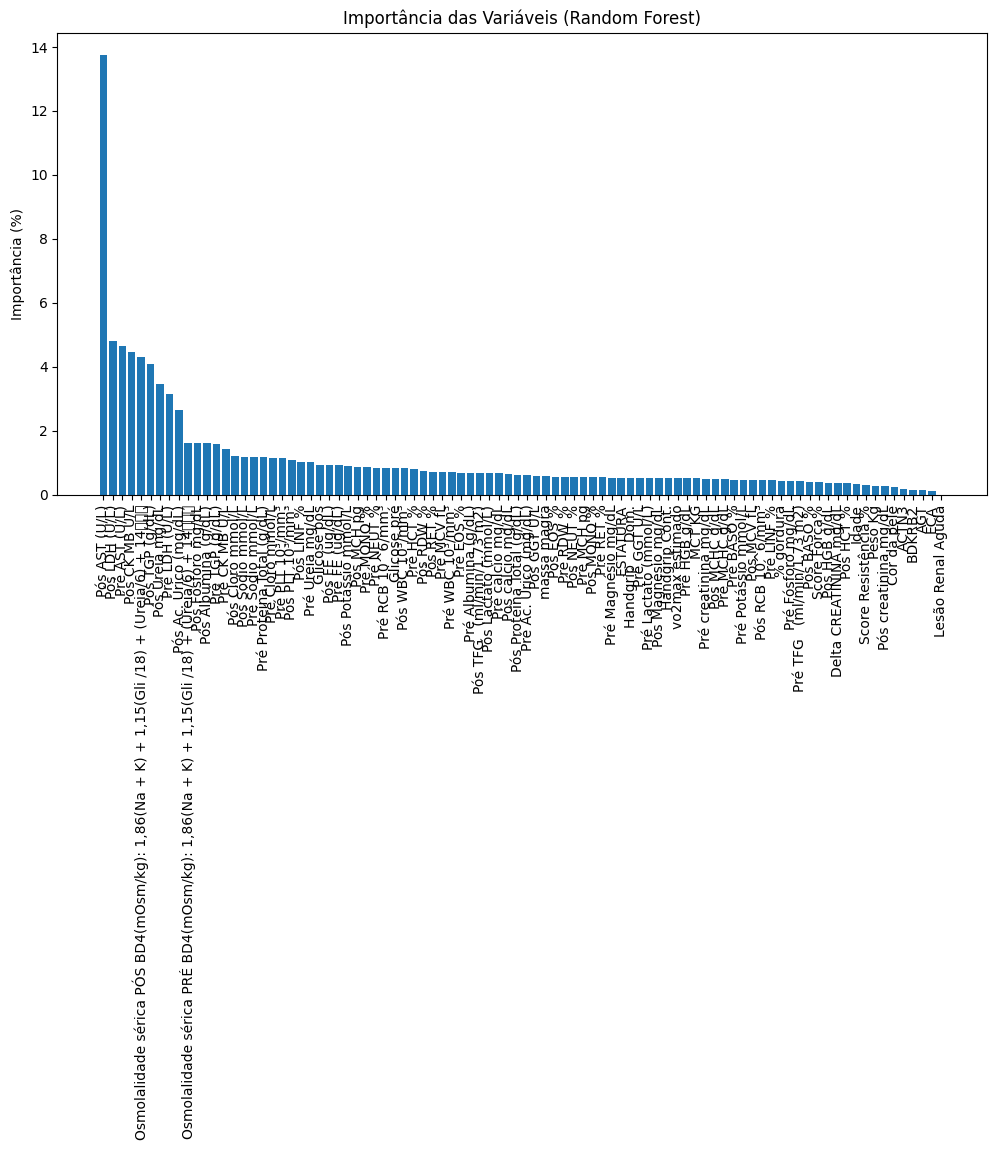

In [15]:
#Utilizando a feature importance do RandomForest paraver a importancia de cada variavel para prever rabdomiolise

def plot_feature_importance(X_train, y_train, feature_names, top_n, name):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    importances = model.feature_importances_

    if top_n is None:
        top_n = len(importances)

    indices = np.argsort(importances)[::-1][:top_n] # Índices ordenados pelas importâncias

    importances_percent = importances[indices] * 100 # Normaliza as importâncias em porcentagem


    plt.figure(figsize=(12, 6))
    plt.title("Importância das Variáveis (Random Forest)")
    plt.bar(range(top_n), importances_percent, align='center')
    plt.xticks(range(top_n), [feature_names[i] for i in indices], rotation=90)
    plt.ylabel("Importância (%)")
    plt.tight_layout()
    plt.show()


    importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance (%)': importances_percent
    })


    importance_df.to_csv(path + name, index=False, sep=";")

plot_feature_importance(X_encoded_Train, y_encoded_Train, colunas, X_encoded_Train.shape[1],"importancia_variaveis_encode.csv")

**AGORA VAMOS VER COMO SERÁ O RESULTADO AO DIVIDIR O DATASET EM 2 DATASETS "ANTES" e "DEPOIS" do curso**

In [16]:
DATASET_ANTES = pd.read_excel(path + file_antes)
DATASET_DEPOIS = pd.read_excel(path + file_depois)

transformar_0_em_NaN(DATASET_ANTES)
transformar_0_em_NaN(DATASET_DEPOIS)

#unindo os 2 datasets em 1
DATASET2 = pd.concat([DATASET_ANTES, DATASET_DEPOIS], ignore_index=True)

#limpando o dataset (Colocar as categorias certas em cada coluna)
DATASET2 = limpar_dataset(DATASET2, 'Lesão Renal Aguda')

#codificando o dataset
DATASET2_encoded = encoded_dataset(DATASET2)

DATASET2_encoded



Idade    Peso Kg  Cor da pele  ACTN3  AGT  ECA  BDKRB2  Score Força%  \
0     33.0  88.000000          1.0      3    1    1       2     25.000000   
1     26.0  74.000000          1.0      0    1    2       1     50.000000   
2     26.0  76.000000          1.0      1    0    1       0     50.000000   
3     25.0  84.000000          1.0      0    2    0       1     56.945274   
4     33.0  82.000000          1.0      0    1    2       1     50.000000   
..     ...        ...          ...    ...  ...  ...     ...           ...   
929   29.0  72.469128          2.0      0    1    1       1     56.945274   
930   27.0  72.469128          2.0      0    1    1       1     56.945274   
931   28.0  72.469128          2.0      0    1    1       1     56.945274   
932   29.0  72.469128          2.0      0    1    1       1     56.945274   
933   29.0  72.469128          2.0      0    1    1       1     56.945274   

     Score Resistência %     CK (U/L)  ...     EOS %    BASO %  Rabdomiólise  \
0              75.000000   337.000000  ...  3.300000  0.300000         False   
1              50.000000   687.000000  ...  0.000000  0.000000         False   
2              50.000000   841.000000  ...  0.000000  0.000000         False   
3              43.077114   363.000000  ...  1.200000  1.000000         False   
4              50.000000   192.000000  ...  1.100000  0.500000         False   
..                   ...          ...  ...       ...       ...           ...   
929            43.077114  1875.875598  ...  2.023433  0.500977         False   
930            43.077114  1875.875598  ...  2.023433  0.500977         False   
931            43.077114  1875.875598  ...  2.023433  0.500977         False   
932            43.077114  1875.875598  ...  2.023433  0.500977         False   
933            43.077114  1875.875598  ...  2.023433  0.500977         False   

     massa magra  MCT KG  ESTATURA  vo2max estimado  Handgrip     Dom.  \
0      75.520000    84.3     181.5        50.850000               35.0   
1      69.490000    75.9     171.0        51.980000               42.0   
2      72.070000    79.2     174.0        52.420000               49.5   
3      75.260000    84.3     178.0        50.680000               60.0   
4      66.260000    79.6     182.0        47.640000               51.0   
..           ...     ...       ...              ...                ...   
929    69.775015    82.8     182.0        47.478563               56.0   
930    69.775015    75.1     170.0        47.478563               48.0   
931    69.775015    82.7     179.5        47.478563               58.0   
932    69.775015    80.5     181.0        47.478563               60.0   
933    69.775015    85.8     178.0        47.478563               55.0   

     Handgrip Cont.  % gordura  
0              37.0  10.050000  
1              43.0   6.080000  
2              49.5   8.720000  
3              57.0  10.610000  
4              49.0  14.840000  
..              ...        ...  
929            59.0  10.682962  
930            60.0  10.682962  
931            52.0  10.682962  
932            50.0  10.682962  
933            56.0  10.682962  

[934 rows x 54 columns]

In [24]:
X_encoded_Train2, X_encoded_Test2, y_encoded_Train2, y_encoded_Test2, colunas2 = preparar_treino_e_teste(DATASET2_encoded, 'Rabdomiólise')

#Salvando Resultados
results_encoded2 = get_tests_result(X_encoded_Train2, X_encoded_Test2, y_encoded_Train2, y_encoded_Test2)
saving_results(results_encoded2,
              path + "ResultadosTestesPIBITI/TesteSemPCA/",
              "resultados_rabdomiolise_encoded2.csv")

#Salvando matriz de covariança
salvar_matriz_covarianca(X_encoded_Train2, "matrizCovariança2.csv",colunas2)


Arquivo salvo com sucesso!


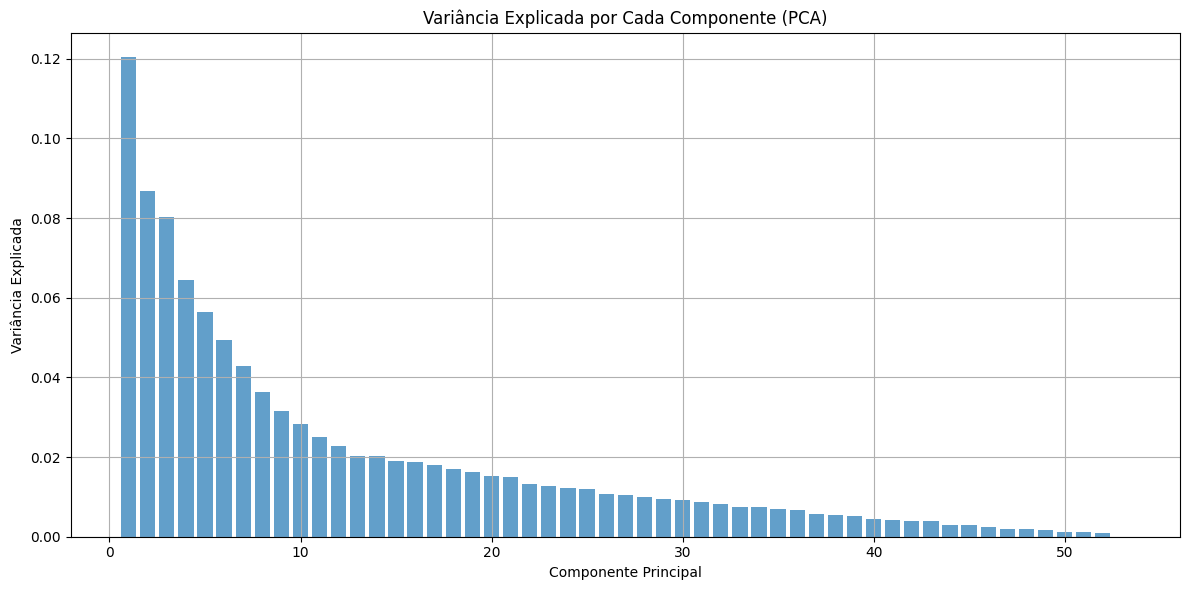

In [18]:
#Variancia por componente:
variancia_por_componente(X_encoded_Train2)

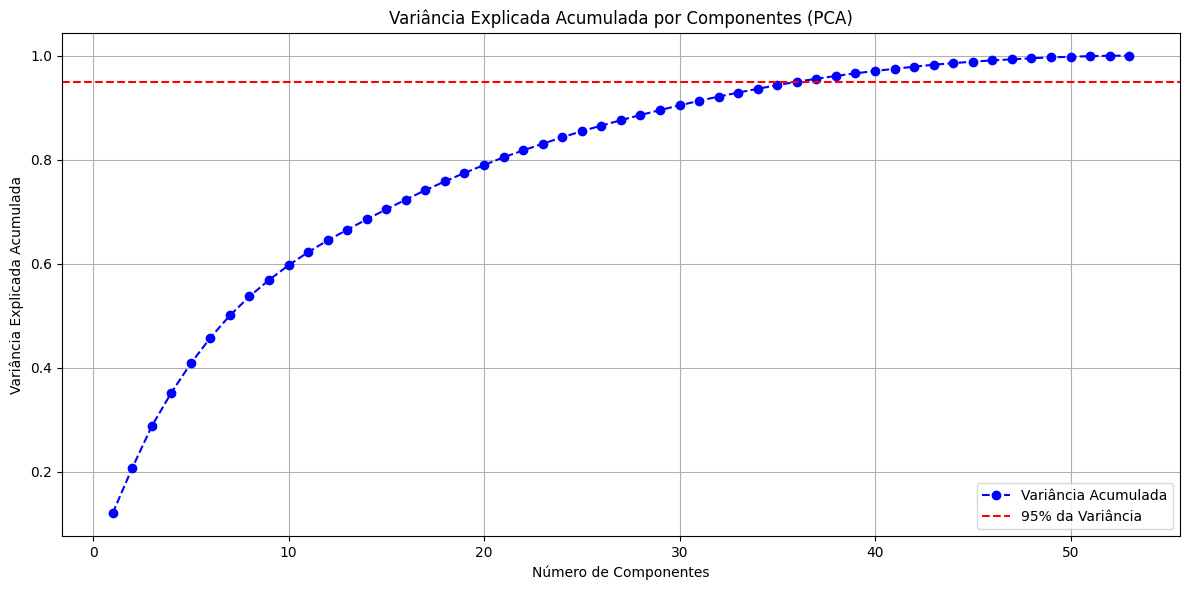

Número de componentes necessários para explicar 95% da variância: 36


In [19]:
#Variancia Explicada Acumulada:
variancia_explicada_acumulada(X_encoded_Train2, 0.95)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


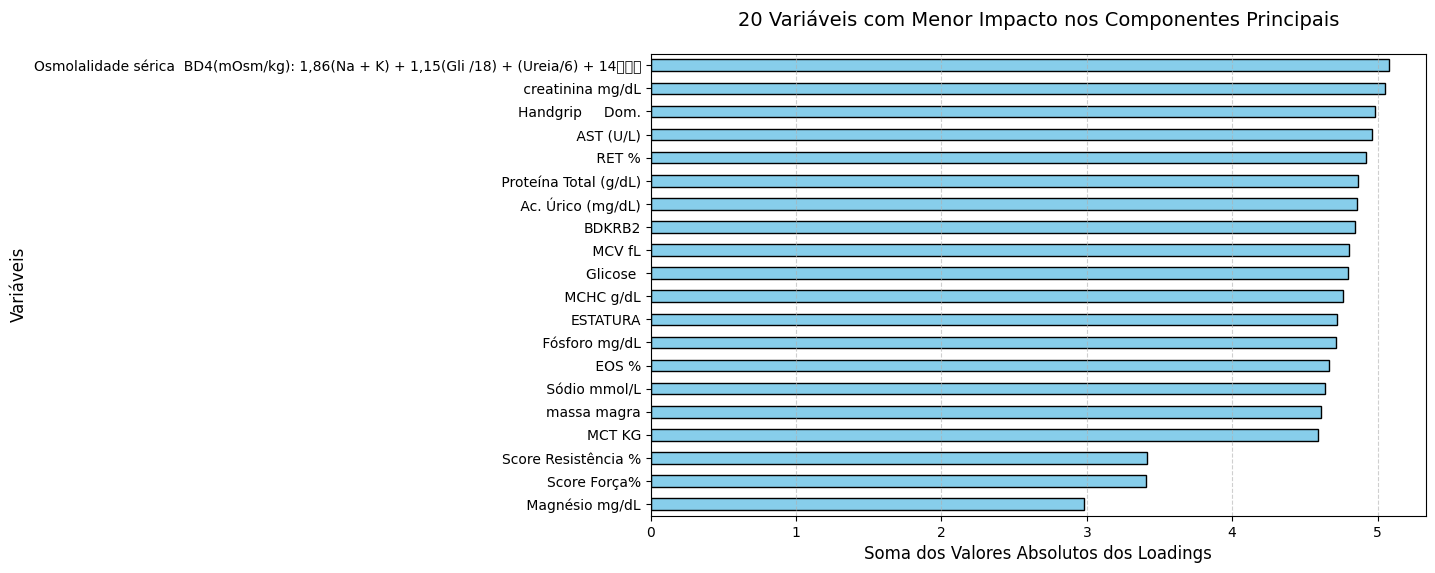

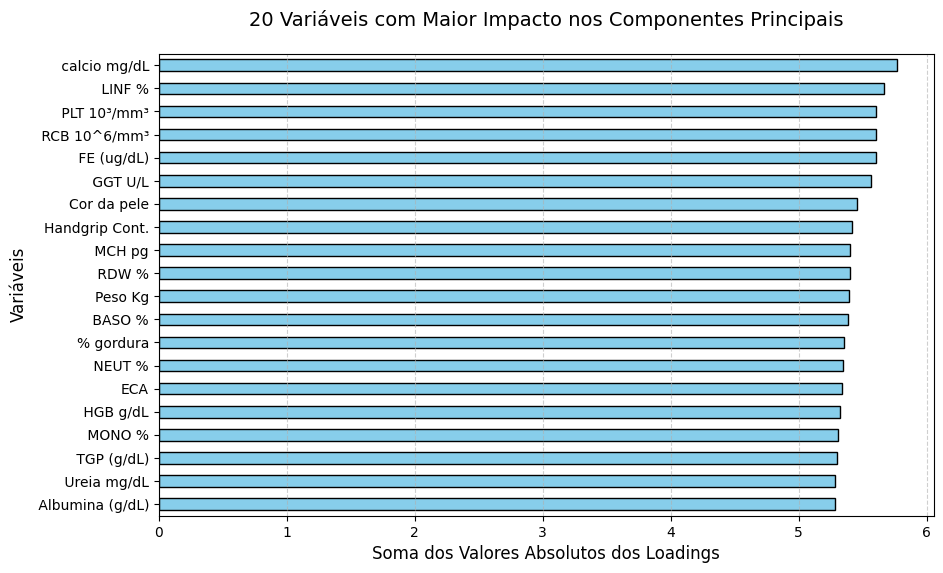

In [20]:
loadings_df2, loadings2 = loadings_df_func(X_encoded_Train2, colunas2)
plot_coef_sum(loadings_df2, loadings2)
plot_coef_sum(loadings_df2, loadings2, mode="maior")

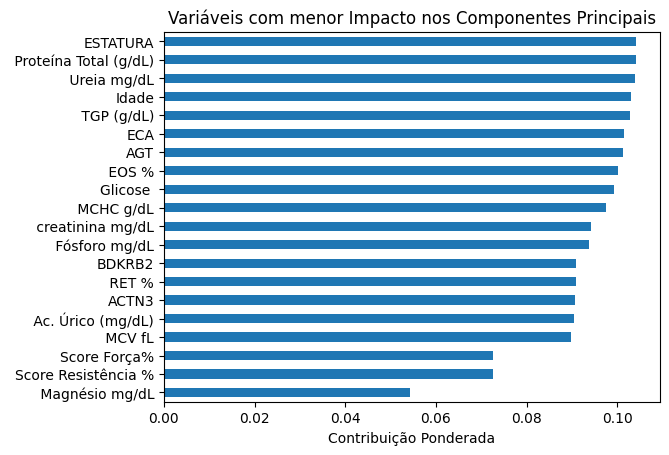

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


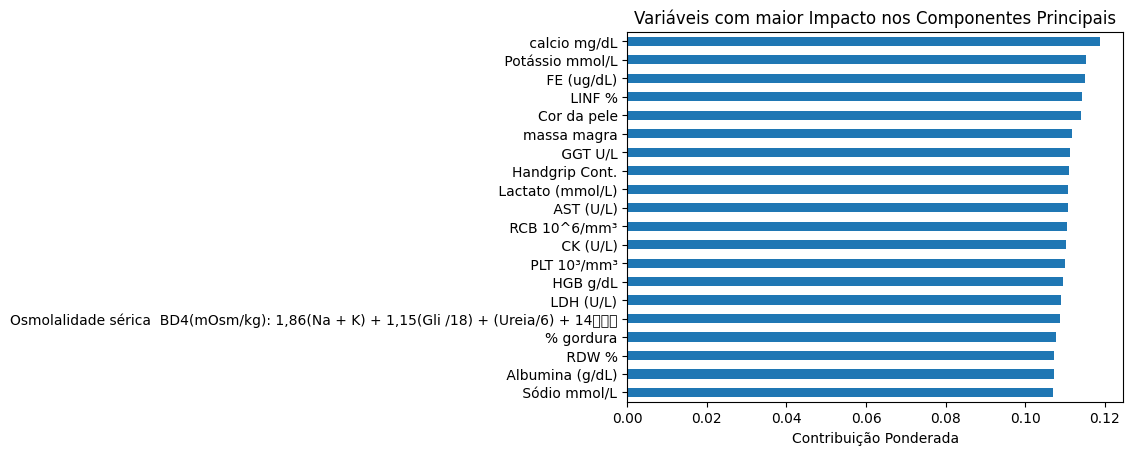

In [21]:
loadings_df2 = weighted_sum_loadings(X_encoded_Train2, loadings_df2, loadings2)
loadings_df2['weighted_contribution']
plot_weighted_contribution(loadings_df2)
plot_weighted_contribution(loadings_df2, mode="maior")

/tmp/ipython-input-2575093226.py:24: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2575093226.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


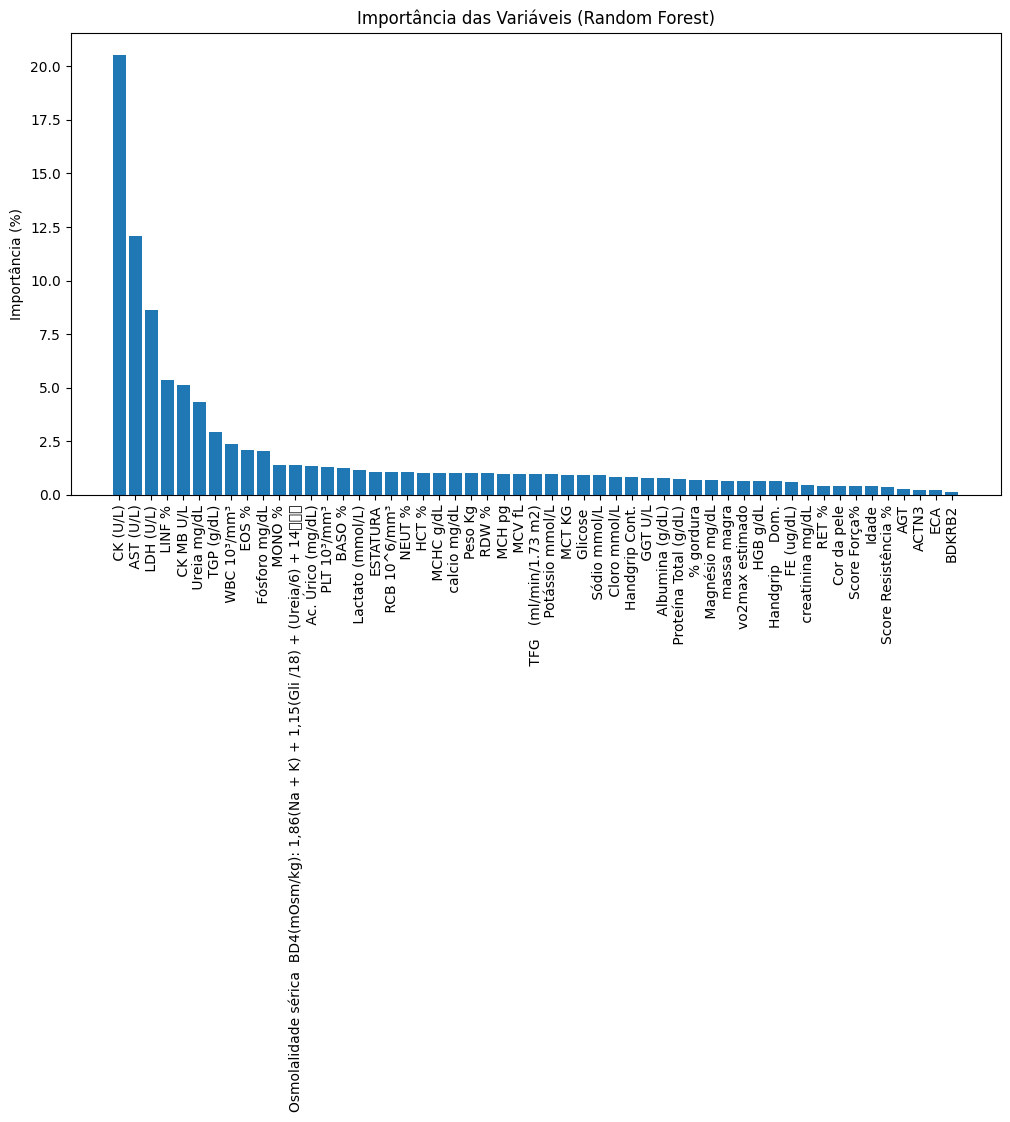

In [22]:
#usando
plot_feature_importance(X_encoded_Train2, y_encoded_Train2, colunas2, X_encoded_Train2.shape[1],"importancia_variaveis_encode2.csv")
